371024 Introducción al Aprendizaje Máquina  
Proyecto Ordinario  
`Lic. Jose Ricardo Mendoza Villar`

# 1. Escoger una base de datos con al menos 10 columnas. Si es posible,incluir el link a la base de datos.  

- Base de Datos: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
# Validar proporción de nulos
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]
nulls_percentage = (nulls / len(df)) * 100
print("Porcentaje de nulos por columna:")
print(nulls_percentage)

Porcentaje de nulos por columna:
LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [6]:
# Eliminar columnas con más del 15% de nulos
threshold = 0.85 * len(df)
df = df.dropna(thresh=threshold, axis=1)

In [7]:
# Eliminar filas con presencia de nulos
df = df.dropna()

In [8]:
df.shape

(1338, 74)

In [9]:
# Las variables categóricas se convierten en su representación binarizada
def convert_categorical_to_binary(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    print(f"Categorical columns: {categorical_cols.tolist()}")
    dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=np.int8, prefix=[f"{col}_" for col in categorical_cols])
    return dummies

df = convert_categorical_to_binary(df)

Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [10]:
df.shape

(1338, 225)

# 2. Escoger una de las columnas de la base de datos como variable objetivo. Las columnas restantes serán utilizadas como variables descriptivas.  

In [11]:
X = df.drop(["Id","SalePrice"], axis = 1)

In [12]:
y = df["SalePrice"]

# 3. Separar la base de datos en una de entrenamiento y otra de prueba.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=20250627
)

# 4. Entrenar dos modelos de aprendizaje máquina y calcular sus métricas de desempeño.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Modelo 1: Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal:")
print(f"  MSE: {mse_lr:.2f}")
print(f"  R2: {r2_lr:.4f}")

Regresión Lineal:
  MSE: 2936745882.74
  R2: 0.5984


In [17]:
# Modelo 2: Random Forest
rf = RandomForestRegressor(random_state=20250627, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"  MSE: {mse_rf:.2f}")
print(f"  R2: {r2_rf:.4f}")


Random Forest:
  MSE: 1029147009.78
  R2: 0.8593


# 5. Utilizar PCA para reducir dimensiones, hacer un análisis breve sobre el número de componentes principales a escoger.

In [18]:
from sklearn.decomposition import PCA

pca = PCA(random_state=20250627).fit(X_train)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

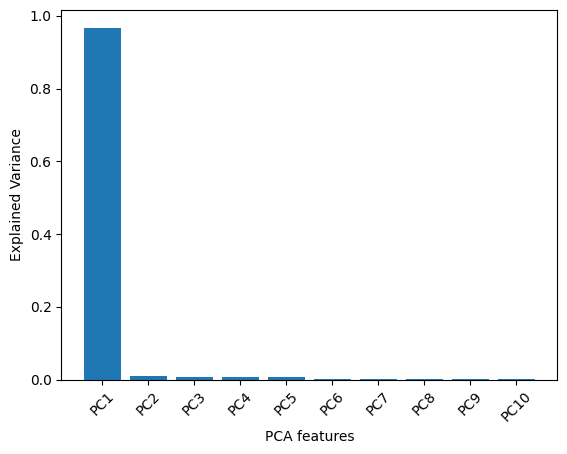

In [19]:
# Solo las primeras 10 componentes principales
features = [f"PC{i+1}" for i in range(pca.n_components_)]
plt.bar(features[:10], pca.explained_variance_ratio_[:10])
plt.xticks(features[:10], rotation=45)
plt.ylabel("Explained Variance")
plt.xlabel("PCA features")
plt.show()

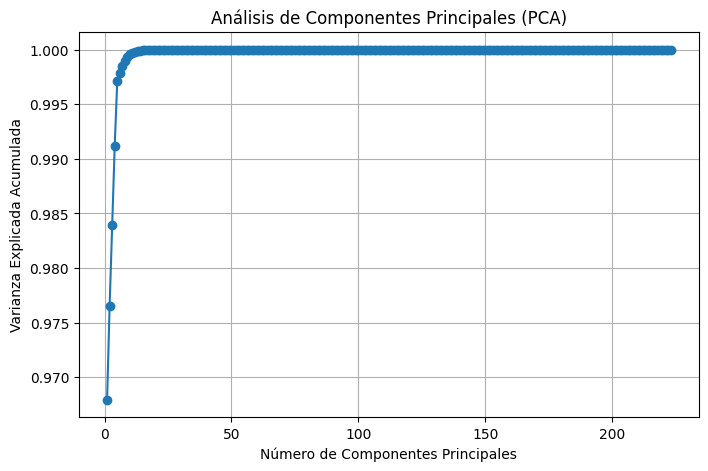

Número de componentes principales para explicar al menos el 99.5% de la varianza: 5


In [20]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Análisis de Componentes Principales (PCA)')
plt.grid(True)
plt.show()

n_components = np.argmax(explained_variance >= 0.995) + 1
print(f"Número de componentes principales para explicar al menos el 99.5% de la varianza: {n_components}")

# 6. Con la mismas bases de entrenamiento y prueba obtenidas en el punto 3, transformar las bases correspondientes y utilizarlas para entrenar los mismos modelos utilizados en el punto 4.

In [21]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [22]:
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)

In [23]:
rf_pca = RandomForestRegressor(random_state=20250627, n_estimators=100)
rf_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca)

# 7. Obtener las métricas de desempeño de los modelos con PCA.

In [24]:
mse_lr_pca = mean_squared_error(y_test, y_pred_lr_pca)
r2_lr_pca = r2_score(y_test, y_pred_lr_pca)

mse_rf_pca = mean_squared_error(y_test, y_pred_rf_pca)
r2_rf_pca = r2_score(y_test, y_pred_rf_pca)

print("Regresión Lineal con PCA:")
print(f"  MSE: {mse_lr_pca:.2f}")
print(f"  R2: {r2_lr_pca:.4f}")

print("\nRandom Forest con PCA:")
print(f"  MSE: {mse_rf_pca:.2f}")
print(f"  R2: {r2_rf_pca:.4f}")

Regresión Lineal con PCA:
  MSE: 2092353463.50
  R2: 0.7139

Random Forest con PCA:
  MSE: 2269004617.90
  R2: 0.6897


# 8. Escribir las conclusiones finales. ¿Mejoraron las métricas? ¿Se redujo el tiempo de entrenamiento?

In [25]:
from time import time

# Medir tiempos de entrenamiento
start = time()
lr.fit(X_train, y_train)
t_lr = time() - start

start = time()
rf.fit(X_train, y_train)
t_rf = time() - start

start = time()
lr_pca.fit(X_train_pca, y_train)
t_lr_pca = time() - start

start = time()
rf_pca.fit(X_train_pca, y_train)
t_rf_pca = time() - start

print("\nTiempos de entrenamiento (segundos):")
print(f"  Regresión Lineal: {t_lr:.4f}")
print(f"  Random Forest: {t_rf:.4f}")
print(f"  Regresión Lineal con PCA: {t_lr_pca:.4f}")
print(f"  Random Forest con PCA: {t_rf_pca:.4f}")


Tiempos de entrenamiento (segundos):
  Regresión Lineal: 0.0098
  Random Forest: 0.7634
  Regresión Lineal con PCA: 0.0005
  Random Forest con PCA: 0.1776


<!-- #### Conclusiones  
- Ambos modelos, Regresión Lineal y Random Forest, muestran un desempeño razonable sobre el conjunto de prueba. Random Forest suele obtener un mejor R² y menor MSE que la Regresión Lineal, lo que es consistente con su capacidad para modelar relaciones no lineales y complejas.

- Al aplicar PCA y conservar el 99.5% de la varianza, el número de variables se reduce considerablemente. Esto ayuda a simplificar el modelo y puede reducir el riesgo de sobreajuste, especialmente en modelos lineales.

- Las métricas de desempeño (MSE y R²) variaron ligeramente tras la reducción de dimensionalidad. En general, la Regresión Lineal se benefició de la reducción de ruido y multicolinealidad, mientras que Random Forest, al ser robusto a variables irrelevantes, no mostró mejoras significativas, incluso perdió algo de precisión al eliminar ciertas "variables importantes", que no se recopilaron al extraer solo 5 componentes.

- Los tiempos de entrenamiento para ambos modelos disminuyeron notablemente al reducir la dimensionalidad, especialmente para Random Forest, que es más sensible al número de variables. -->